## <font color = blue> Concept of a Manifold
        Locally flat, globally complex

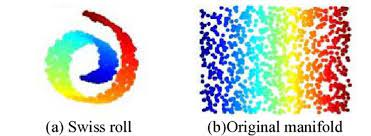

In [228]:
from IPython.display import Image

image_path = '/Users/p.mittal/Roux/manifold.jpeg'

# Display the image in Jupyter Notebook
Image(filename=image_path)

## <font color = darkblue> The notebook contains code for the following clustering techniques:
    - K-Means
    - Heirarchical 
    - DBSCAN
    - HDBSCAN
    

In [128]:
# !pip install hdbscan

## <font color = blue> Samples of synthetic data

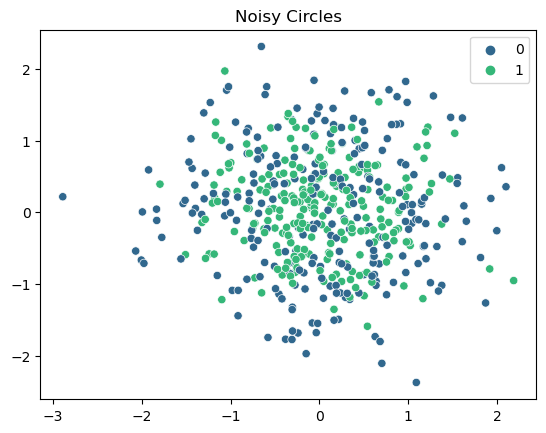

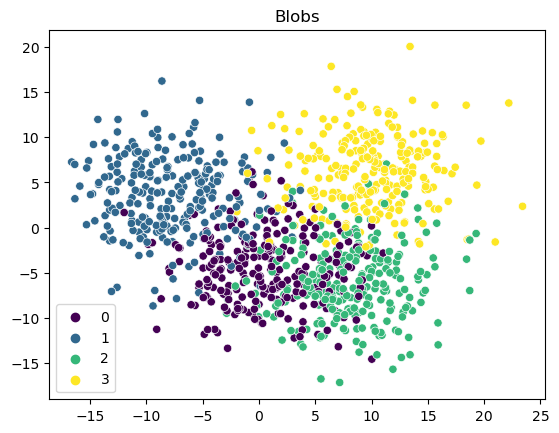

In [236]:
from sklearn import cluster, datasets, mixture

n_samples= 500

# ---------------
# noisy circles 
# ---------------

noisy_circles,y = datasets.make_circles(n_samples=n_samples, factor=0.4, noise=0.6)

# ---------------
# Visualize 
# ---------------
sns.scatterplot(x=noisy_circles[:, 0], y=noisy_circles[:, 1], hue=y, palette="viridis")
plt.title("Noisy Circles")
plt.show()

# ---------------
# blobs
# ---------------
X, y = make_blobs(n_samples=1000, cluster_std=4, centers=4, n_features=5, random_state=100)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="viridis")
plt.title("Blobs")
plt.show()


In [234]:
noisy_circles

array([[-1.36172985e+00, -7.25240100e-01],
       [-3.80017638e-01, -2.76332706e-01],
       [ 4.00027349e-02,  9.09397748e-01],
       [ 3.29111357e-02, -6.94700619e-02],
       [-6.73950600e-01, -2.99059636e-01],
       [ 1.91228169e-01,  2.08280536e-01],
       [ 1.86402156e+00,  2.28832411e-02],
       [ 6.48824202e-01,  1.88610285e+00],
       [ 2.99238951e-01, -1.25275599e+00],
       [-2.36569688e-02, -7.91371543e-02],
       [ 9.09287446e-01, -1.47029849e+00],
       [ 4.14572990e-01,  2.71924736e-02],
       [-6.55840632e-01,  1.29711413e+00],
       [-4.27701515e-01,  2.86844244e-01],
       [-1.84050852e-01,  8.96120223e-01],
       [ 1.86482932e-01, -8.84940457e-01],
       [ 2.27798612e+00, -7.46722091e-02],
       [-5.91770961e-01, -6.91987441e-01],
       [-3.81228053e-01,  1.13280734e+00],
       [ 1.31378208e+00, -1.08606540e+00],
       [-1.92564823e+00, -3.60265615e-01],
       [ 2.83741817e-01,  1.02809643e+00],
       [-5.05440291e-01, -9.43322058e-01],
       [-3.

In [241]:
pd.DataFrame(X)[1].describe()

<IPython.core.display.Javascript object>

count    1000.000000
mean       -0.215485
std         6.601416
min       -17.128481
25%        -5.657521
50%        -0.373692
75%         5.101741
max        20.023714
Name: 1, dtype: float64

## <font color = darkblue> Heriarchical Clustering
    - Ward Method: Minimizes within-cluster sum of squares (WSS) = Σ (x - c)^2
    

<IPython.core.display.Javascript object>

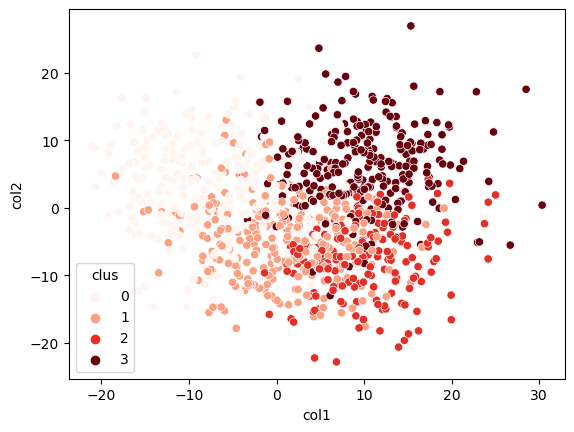

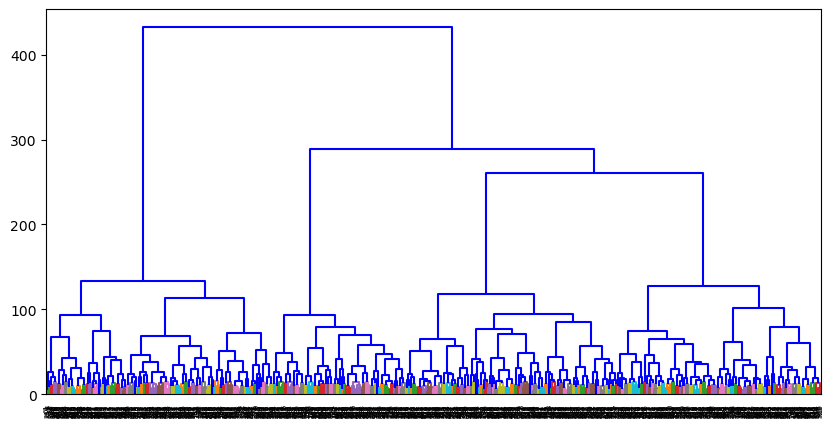

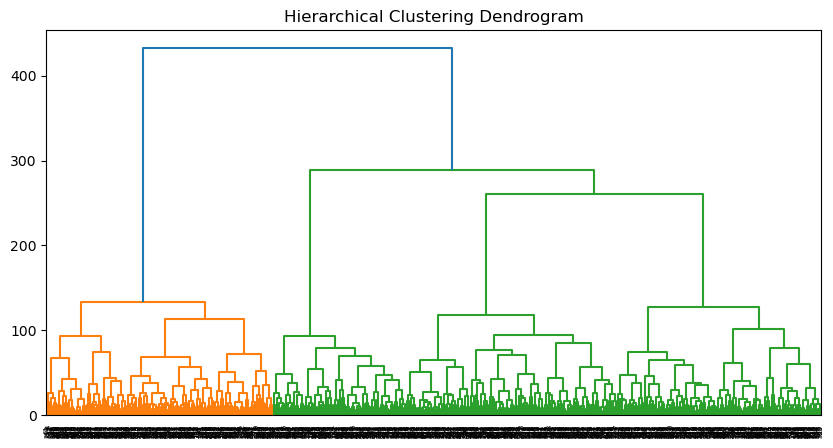

In [244]:
# ----------------------------
## Agglomerative clustering
# ----------------------------

from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate df with 1000 samples, 4 clusters and 5 features
X, y = make_blobs(n_samples=1000, cluster_std=6, centers=4, n_features=5, random_state=100)

# ------------------------------------------------
# Perform agglomerative clustering with 4 clusters
# ------------------------------------------------

agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X)

clus_df = pd.DataFrame(X, columns=['col1', 'col2', 'col3', 'col4', 'col5'])
clus_df["clus"]= agg_clustering.labels_

# ------------------------------------------------
# Plotting various renditions of the data and clusters
# ------------------------------------------------

import seaborn as sns
# Scatterplot 
sns.scatterplot(x='col1', y='col2', data=clus_df, hue="clus", palette='Reds')
    

    
# ------------------------------------------------
# Dendogram using scipy
# ------------------------------------------------

import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# ------------------------------------------------
# Compute the linkage matrix using the Ward method
# ------------------------------------------------
Z = linkage(X, method='ward')

# ------------------------------------------------
# Customize the color coding of the dendrogram
# ------------------------------------------------
color_threshold = 15
above_threshold_color = 'b'

# ------------------------------------------------
# Plot the dendrogram with the custom color coding
# ------------------------------------------------
plt.figure(figsize=(10, 5))
dendrogram(Z, color_threshold=color_threshold, above_threshold_color=above_threshold_color)
plt.show()


# ------------------------------------------------
# Plot the default dendrogram
# ------------------------------------------------
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [245]:
clus_df["clus"].value_counts()

0    293
3    273
1    263
2    171
Name: clus, dtype: int64

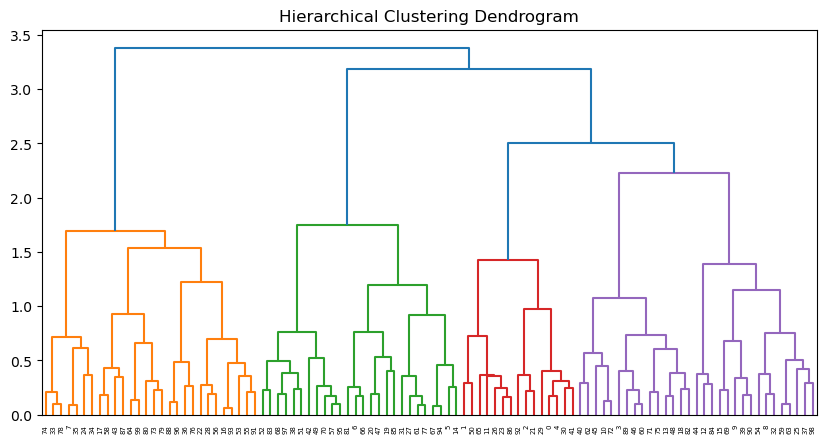

In [250]:
# ------------------------------------------------
# How to plot Dendogram using Scipy
# ------------------------------------------------
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate random data
X = np.random.rand(100, 4)

# Compute the linkage matrix using the Ward method
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


## <font color = blue> Single Linkage Clustering

    - Initially, each data point is treated as a separate cluster.
    - The algorithm computes the pairwise distances between all data points and creates a distance matrix.
    - The two clusters with the smallest distance between them are merged to form a new, larger cluster.
    - The distance matrix is updated to reflect the new distances between the new cluster and the remaining clusters.
    - The above steps are repeated until all data points are in a single cluster.

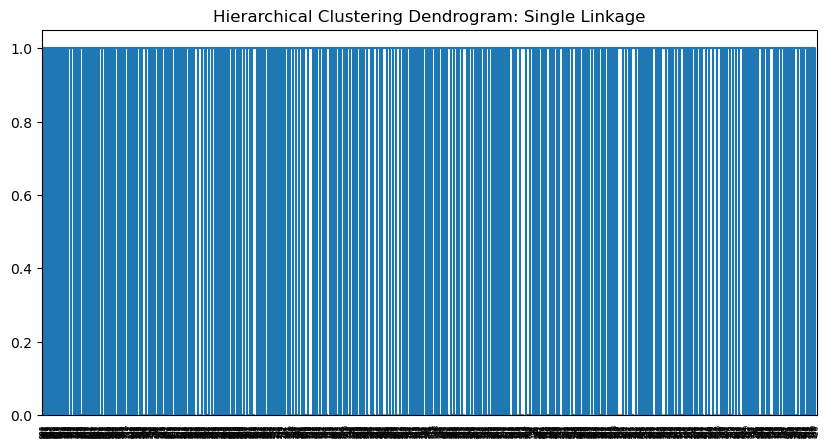

<IPython.core.display.Javascript object>

,one,two
0,8,8
1,15,16
2,1,5
3,5,16
4,9,17
...,...,...
995,14,5
996,11,0
997,19,1
998,11,10


In [247]:
# ------------------------------------------------
# How to plot Dendogram using Scipy
# ------------------------------------------------
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Generate random data
X = np.random.randint(0,20, size=(1000, 2))

# Compute the linkage matrix using the Single method
Z = linkage(X, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram: Single Linkage')
plt.show()

pd.DataFrame(X,columns = ['one','two'])

## <font color = blue> KMeans

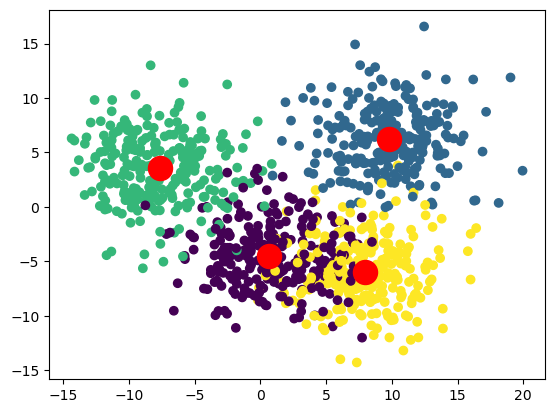

In [46]:
from sklearn.cluster import KMeans

# ----------------------------------------
# Create KMeans object with # clusters of your choice
# ----------------------------------------
kmeans = KMeans(n_clusters=4, random_state=100)

# ----------------------------------------
# Fit KMeans model to the data
# ----------------------------------------
kmeans.fit(X)

# ----------------------------------------
# Get the cluster labels and centroids
# ----------------------------------------
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# ----------------------------------------
# Plot the data with colors assigned to each cluster
# Experiment with various coobinations of features
# ----------------------------------------
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300, c='r')
plt.show()


In [56]:
# ----------------------
# Plotting a 3D chart
# ----------------------

import plotly.graph_objects as go

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Create a 3D scatter plot of the data with colors assigned to each cluster
fig = go.Figure(data=[go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=X[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels,
        colorscale='Viridis',
        opacity=0.8
    )
)])

# # Add the centroids to the plot
fig.add_trace(go.Scatter3d(
    x=centroids[:, 0], y=centroids[:, 1], z=centroids[:, 2],
    mode='markers',
    marker=dict(
        size=10,
        color='red',
        symbol='diamond'
    ),
    name='Centroids'
))

# Set the layout of the plot
fig.update_layout(scene=dict(
    xaxis_title='Col1',
    yaxis_title='Col2',
    zaxis_title='Col3'
))

# # Show the plot
fig.show()


## <font color = blue> Mini Batch K-means

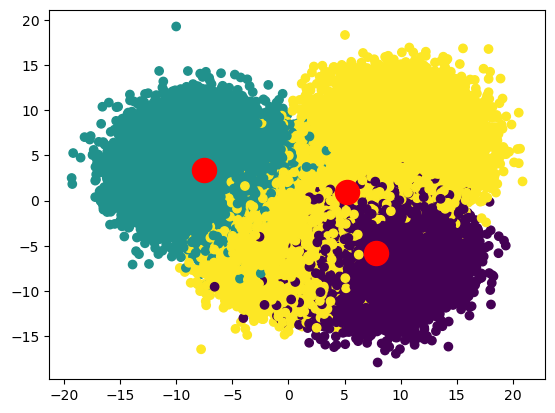

In [124]:
from sklearn.cluster import MiniBatchKMeans


# -----------------------------------------------------------------------------
# Generate df with 1000 samples, 4 clusters and 5 features
# -----------------------------------------------------------------------------
X, y = make_blobs(n_samples=100000, cluster_std=3, centers=4, n_features=5, random_state=100)


# -----------------------------------------------------------------------------
# Create MiniBatchKMeans object with 3 clusters and a batch size of 10
# -----------------------------------------------------------------------------
mbkmeans = MiniBatchKMeans(n_clusters=3, batch_size=10, random_state=100)

# -----------------------------------------------------------------------------
# Fit MiniBatchKMeans model to the data
# -----------------------------------------------------------------------------
mbkmeans.fit(X)

# -----------------------------------------------------------------------------
# Get the cluster labels and centroids
# -----------------------------------------------------------------------------
labels = mbkmeans.labels_
centroids = mbkmeans.cluster_centers_


# ----------------------------------------
# Plot the data with colors assigned to each cluster
# Experiment with various coobinations of features
# ----------------------------------------
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300, c='r')
plt.show()

## <font color = red> Comparison of K-Means and mini-batch k-means

In [141]:
from sklearn.cluster import MiniBatchKMeans


# -----------------------------------------------------------------------------
# Generate df 4 clusters and 5 features
# -----------------------------------------------------------------------------
X, y = make_blobs(n_samples=1000000, cluster_std=3, centers=4, n_features=10, random_state=20)


# -----------------------------------------------------------------------------
# Create MiniBatchKMeans and KMeans objects with 3 clusters and a batch size of 10
# -----------------------------------------------------------------------------
mbkmeans = MiniBatchKMeans(n_clusters=4, batch_size=10000, random_state=100)
kmeans = KMeans(n_clusters=4, random_state=100)

# ----------------------------------------
# Fit models to the data
# ----------------------------------------

print(f'Start time for Mini Batch K Means {datetime.datetime.now().strftime("%H:%M:%S")}')
mbkmeans.fit(X)
print(f'End time for Mini Batch K Means {datetime.datetime.now().strftime("%H:%M:%S")}')
kmeans.fit(X)
print(f'End time for K Means {datetime.datetime.now().strftime("%H:%M:%S")}')

# ----------------------------------------
# Get the cluster labels and centroids
# ----------------------------------------
labels_mini = mbkmeans.labels_
labels_km = kmeans.labels_

centroids_mini = mbkmeans.cluster_centers_
centroids_km = kmeans.cluster_centers_


# # ----------------------------------------
# # Plot the data with colors assigned to each cluster
# # Experiment with various coobinations of features
# # ----------------------------------------
# plt.scatter(X[:, 0], X[:, 1], c=labels_mini)
# plt.scatter(centroids_mini[:, 0], centroids_mini[:, 1], marker='o', s=300, c='r')
# plt.show()

# plt.scatter(X[:, 0], X[:, 1], c=labels_km)
# plt.scatter(centroids_km[:, 0], centroids_km[:, 1], marker='o', s=300, c='r')
# plt.show()

Start time for Mini Batch K Means 16:08:33
End time for Mini Batch K Means 16:08:33
End time for K Means 16:08:34


## <font color = darkblue> DBSCAN : Density-Based Spatial Clustering of Applications with Noise
    - Try various combinations of cluster_std values to highlight the sensitivities of the algorithm 

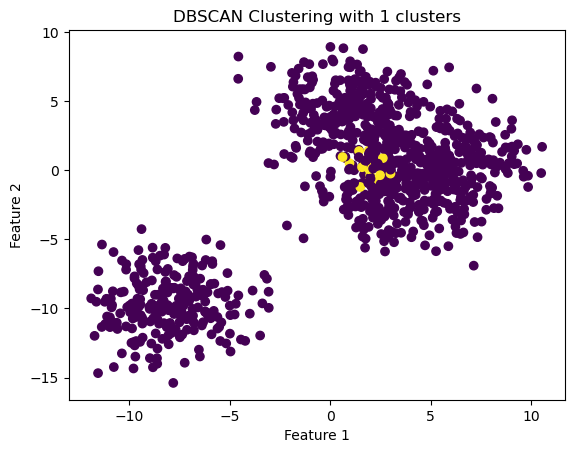

1

In [255]:
from sklearn.cluster import DBSCAN

# ------------------------
# Generating random data
# ------------------------


X, labels_true = make_blobs(
    n_samples=1000,  cluster_std=2, centers = 4,n_features=5,random_state=0
)



# -----------------------------------
# Create the DBSCAN model 
# -----------------------------------
dbscan = DBSCAN(eps=2, min_samples=15)

# Fit the model to the data
dbscan.fit(X)

# Get the labels and number of clusters
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Plot the results
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.title(f'DBSCAN Clustering with {n_clusters} clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

n_clusters
# labels

## <font color = blue> HDBSCAN: Hierarchical Density-Based Spatial Clustering of Applications with Noise

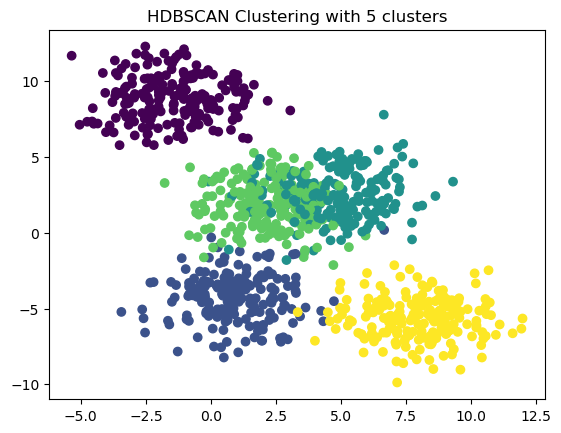

array([4, 3, 4, 3, 3, 0, 2, 3, 2, 3])

In [258]:
import hdbscan

# ------------------------
# Generating random data
# ------------------------
X, labels_true = make_blobs(
    n_samples=1000,  cluster_std=1.5, centers = 5,n_features=10,random_state=100
)



# -------------------------
# Create the HDBSCAN model
# -------------------------
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)

# -------------------------
# Fit the model to the data
# -------------------------
hdbscan_model.fit(X)

# --------------------------------------------------
# Get the labels and number of clusters
# --------------------------------------------------
labels = hdbscan_model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title(f'HDBSCAN Clustering with {n_clusters} clusters')
plt.show()

n_clusters

labels[0:10]

## Performance Evaluation

<font color = blue> Silhouette Score: It measures how well each data point is clustered relative to its neighboring clusters. A high silhouette score indicates that the data point is well-matched to its own cluster and poorly matched to neighboring clusters.


<font color = red>Homogeneity, Completeness, and V-measure: measures the purity of each cluster and the completeness of each true class. Homogeneity measures how well each cluster contains only data points from a single true class, while completeness measures how well all data points from a true class are assigned to a single cluster. V-measure is the harmonic mean of homogeneity and completeness.
    
<font color = green>Rand Index: measures the similarity between the true labels and the predicted labels. It counts the number of true positives, true negatives, false positives, and false negatives to calculate a score. A higher Rand Index indicates better clustering.


In [155]:
from sklearn import metrics

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Generate sample data
X, true = make_blobs(n_samples=750, centers=4, cluster_std=.8,
                            random_state=0)

# DBSCAN is used for example
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(f'Estimated number of clusters:  {n_clusters_}')
print(f'Estimated number of noise points:   {n_noise_}')

print("Homogeneity: %0.3f" % metrics.homogeneity_score(true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(true, labels))

print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(true, labels))

print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))




Estimated number of clusters:  4
Estimated number of noise points:   354
Homogeneity: 0.518
Completeness: 0.504
V-measure: 0.511
Adjusted Rand Index: 0.258
Silhouette Coefficient: 0.102
